In [ ]:
BB# Importing library
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, GRU,Reshape

In [ ]:
##  Image Data Augmentation
trainDataGen = ImageDataGenerator(
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
## Loading Training Images
trainGenerator = trainDataGen.flow_from_directory(
    "K:\Devnagri Hindi\DevanagariHandwrittenCharacterDataset\Train",
    target_size = (32,32),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = "categorical")

Found 78200 images belonging to 46 classes.


In [ ]:
## Defining all labled charaters 
prev = ""
labels = ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
count = 0;

In [ ]:
## Loading Validation set images
validation_generator = test_datagen.flow_from_directory(
    "K:\Devnagri Hindi\DevanagariHandwrittenCharacterDataset\Test",
    target_size=(32,32),
    batch_size=32,
    color_mode = "grayscale",
    class_mode= 'categorical')

Found 13800 images belonging to 46 classes.


In [ ]:

## Defining The Model

model = Sequential()
model.add(Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        strides = 1,
                        activation = "relu",
                        input_shape = (32,32,1)))

model.add(Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        strides = 1,
                        activation = "relu",
                        input_shape = (32,32,1)))

model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2),
                        padding="same"))

model.add(Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        strides = 1,
                        activation = "relu"))

model.add(Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        strides= 1,
                        activation = "relu"))

model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2),
                        padding="same"))

model.add(Reshape((model.output_shape[1],-1)))


model.add(GRU(64))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation = "relu",kernel_initializer = "uniform"))

model.add(Dense(64,activation = "relu",kernel_initializer = "uniform"))

model.add(Dense(46,activation = "softmax",kernel_initializer = "uniform"))



In [ ]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
reshape (Reshape)            (None, 5, 320)            0

In [ ]:
# Training and Testing the model
model.fit_generator(
    trainGenerator,
    epochs = 20,
    steps_per_epoch = 2444,
    validation_data = validation_generator,
    validation_steps = 432,

    use_multiprocessing = True)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2444/2444 [==============================] - 301s 121ms/step - loss: 2.5934 - accuracy: 0.2618 - val_loss: 0.4055 - val_accuracy: 0.8646
Epoch 2/20
2444/2444 [==============================] - 162s 66ms/step - loss: 0.5159 - accuracy: 0.8341 - val_loss: 0.1717 - val_accuracy: 0.9484
Epoch 3/20
2444/2444 [==============================] - 154s 63ms/step - loss: 0.3035 - accuracy: 0.9066 - val_loss: 0.1172 - val_accuracy: 0.9622
Epoch 4/20
2444/2444 [==============================] - 168s 69ms/step - loss: 0.2259 - accuracy: 0.9317 - val_loss: 0.0881 - val_accuracy: 0.9738
Epoch 5/20
2444/2444 [==============================] - 115s 47ms/step - loss: 0.1887 - accuracy: 0.9424 - val_loss: 0.0788 - val_accuracy: 0.9754
Epoch 6/20
2444/2444 [==============================] - 102s 42ms/step - loss: 0.1635 - accuracy: 0.9504 - val_loss: 0.0614 - val_accuracy: 0.9817
Epoch 7/20
2444/2444 [==============================] - 109s 44ms/step - loss: 0.1481 - accuracy: 0.9559 - val_loss: 

In [ ]:
model.save('dev_gru.h5')

In [ ]:
# !pip install --user  imutils
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt


[INFO] loading network...


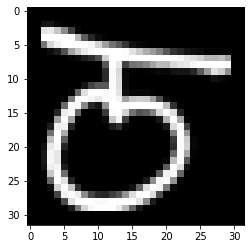

The letter is  ठ


In [ ]:


labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
image = cv2.imread('../input/devnagri-hindi-dataset/DevanagariHandwrittenCharacterDataset/Test/character_12_thaa/10622.png')
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = np.expand_dims(image, axis=0)

image = np.expand_dims(image, axis=3)


print("[INFO] loading network...")
plt.imshow(orig, interpolation='nearest')
plt.show()

# classify the input image
lists = model.predict(image)[0]

print("The letter is ",labels[np.argmax(lists)])

In [ ]:
from IPython.display import FileLink 
FileLink(r'dev_gru.h5')

/kaggle/working/dev_gru.h5

[INFO] loading network...


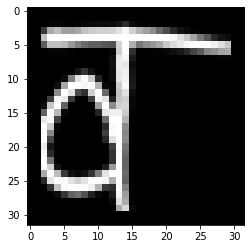

The letter is  व


In [ ]:

labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
image = cv2.imread('../input/devnagri-hindi-dataset/DevanagariHandwrittenCharacterDataset/Test/character_29_waw/11476.png')
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = np.expand_dims(image, axis=0)

image = np.expand_dims(image, axis=3)

print("[INFO] loading network...")
 
plt.imshow(orig, interpolation='nearest')
plt.show()

# classify the input image
lists = model.predict(image)[0]

print("The letter is ",labels[np.argmax(lists)])

[INFO] loading network...


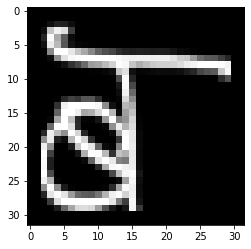

The letter is  ब


In [ ]:


labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
image = cv2.imread('../input/devnagri-hindi-dataset/DevanagariHandwrittenCharacterDataset/Test/character_23_ba/11227.png')
orig = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = np.expand_dims(image, axis=0)

image = np.expand_dims(image, axis=3)

print("[INFO] loading network...")
plt.imshow(orig, interpolation='nearest')
plt.show()

# classify the input image
lists = model.predict(image)[0]

print("The letter is ",labels[np.argmax(lists)])

In [ ]:
from os import listdir
import cv2
import pandas as pd
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2


In [ ]:
from keras.models import Sequential, load_model
model = load_model('dev_gru.h5')

In [ ]:
X_Test = []  
Y_Test = [] 

directory_root = "K:\Devnagri Hindi\DevanagariHandwrittenCharacterDataset\Test"
print("[INFO] Loading Training images...")
root_dir = listdir(directory_root)
print("\nTotal Folder : ",len(root_dir))

for char_folder in root_dir :
  print("\n\nLoading Folder : ",char_folder)
  char_folder_list = listdir(f"{directory_root}/{char_folder}")
  for image in char_folder_list:
    X_Test.append(directory_root+"/"+char_folder+"/"+image)
    Y_Test.append(char_folder)
  total_images = len(char_folder_list)
  print("Total Images found : ",total_images)


[INFO] Loading Training images...

Total Folder :  46


Loading Folder :  character_10_yna
Total Images found :  300


Loading Folder :  character_11_taamatar
Total Images found :  300


Loading Folder :  character_12_thaa
Total Images found :  300


Loading Folder :  character_13_daa
Total Images found :  300


Loading Folder :  character_14_dhaa
Total Images found :  300


Loading Folder :  character_15_adna
Total Images found :  300


Loading Folder :  character_16_tabala
Total Images found :  300


Loading Folder :  character_17_tha
Total Images found :  300


Loading Folder :  character_18_da
Total Images found :  300


Loading Folder :  character_19_dha
Total Images found :  300


Loading Folder :  character_1_ka
Total Images found :  300


Loading Folder :  character_20_na
Total Images found :  300


Loading Folder :  character_21_pa
Total Images found :  300


Loading Folder :  character_22_pha
Total Images found :  300


Loading Folder :  character_23_ba
Total Images found :  

In [ ]:
classes_labels = listdir(directory_root)
classes_labels

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [ ]:
len(Y_Test)

13800

In [ ]:
Predicted_Y_Label = []

for image_path in X_Test:
    image = cv2.imread(image_path)
    orig = image.copy()

    # pre-process the image for classification
    image = cv2.resize(image, (32,32))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = np.expand_dims(image, axis=0)

    image = np.expand_dims(image, axis=3)

    # classify the input image
    lists = model.predict(image)[0]
    print('Model Predicted ',classes_labels[np.argmax(lists)])
    Predicted_Y_Label.append(classes_labels[np.argmax(lists)])

Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicted  character_10_yna
Model Predicte

In [ ]:
#confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Predicted_Y_Label)
print(cm)

[[297   0   0 ...   0   0   0]
 [  0 297   1 ...   0   0   0]
 [  0   0 298 ...   0   0   0]
 ...
 [  0   0   0 ... 300   0   0]
 [  0   0   0 ...   0 299   0]
 [  0   0   0 ...   0   0 299]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Predicted_Y_Label))

                           precision    recall  f1-score   support

         character_10_yna       0.98      0.99      0.99       300
    character_11_taamatar       0.97      0.99      0.98       300
        character_12_thaa       0.99      0.99      0.99       300
         character_13_daa       0.98      0.99      0.99       300
        character_14_dhaa       0.97      0.97      0.97       300
        character_15_adna       1.00      1.00      1.00       300
      character_16_tabala       0.98      0.97      0.98       300
         character_17_tha       0.99      0.95      0.97       300
          character_18_da       0.97      0.97      0.97       300
         character_19_dha       0.99      0.99      0.99       300
           character_1_ka       0.99      1.00      1.00       300
          character_20_na       0.99      1.00      0.99       300
          character_21_pa       0.99      0.99      0.99       300
         character_22_pha       1.00      0.99      1.00     